# data preparation and EDA

#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'

#### importing first dataset

In [2]:
data1=pd.read_csv('AQA04.Crop Yield and Production.csv')
data1

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA04C1,Area under Crops,2008,2008,1,"Total wheat, oats and barley",000 Hectares,320.7
1,AQA04C1,Area under Crops,2008,2008,11,Total wheat,000 Hectares,110.7
2,AQA04C1,Area under Crops,2008,2008,111,Winter wheat,000 Hectares,87.5
3,AQA04C1,Area under Crops,2008,2008,112,Spring wheat,000 Hectares,23.2
4,AQA04C1,Area under Crops,2008,2008,12,Total oats,000 Hectares,22.9
...,...,...,...,...,...,...,...,...
541,AQA04C3,Crop Production,2021,2021,131,Winter barley,000 Tonnes,638.8
542,AQA04C3,Crop Production,2021,2021,132,Spring barley,000 Tonnes,917.6
543,AQA04C3,Crop Production,2021,2021,2,Beans and peas,000 Tonnes,54.4
544,AQA04C3,Crop Production,2021,2021,3,Oilseed rape,000 Tonnes,52.2


#### importing second dataset

In [3]:
data2=pd.read_csv('AQA03_Crop Yield (1985 - 2007).csv')
data2

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA03C1,Area under Crops,1985,1985,1,"Total wheat, oats and barley",000 Hectares,386.2
1,AQA03C1,Area under Crops,1985,1985,11,Total wheat,000 Hectares,77.7
2,AQA03C1,Area under Crops,1985,1985,111,Winter wheat,000 Hectares,60.3
3,AQA03C1,Area under Crops,1985,1985,112,Spring wheat,000 Hectares,17.4
4,AQA03C1,Area under Crops,1985,1985,12,Total oats,000 Hectares,24.9
...,...,...,...,...,...,...,...,...
1168,AQA03C3,Crop Yield,2007,2007,4,Potatoes,000 Tonnes,399.0
1169,AQA03C3,Crop Yield,2007,2007,5,Turnips,000 Tonnes,NaN
1170,AQA03C3,Crop Yield,2007,2007,61,Sugar beet,000 Tonnes,NaN
1171,AQA03C3,Crop Yield,2007,2007,62,Fodder beet,000 Tonnes,NaN


## EDA

### analysing first dataset

#### checking for null values

In [4]:
data1.isnull().sum()

STATISTIC       0
Statistic       0
TLIST(A1)       0
Year            0
C02039V02469    0
Type of Crop    0
UNIT            0
VALUE           0
dtype: int64

#### description of data

In [5]:
data1['VALUE'].describe()

count     546.000000
mean      214.459341
std       457.556839
min         2.500000
25%         8.400000
50%        23.750000
75%       165.550000
max      2633.600000
Name: VALUE, dtype: float64

#### exploring unit feature

In [6]:
data1['UNIT'].unique()

array(['000 Hectares', 'Tonnes', '000 Tonnes'], dtype=object)

#### exploring measurment

In [7]:
data1['Statistic'].unique()

array(['Area under Crops', 'Crop Yield per Hectare', 'Crop Production'],
      dtype=object)

#### exploring units

In [8]:
data1[data1['Statistic']=='Area under Crops']['UNIT'].unique()

array(['000 Hectares'], dtype=object)

In [9]:
data1[data1['Statistic']=='Crop Yield per Hectare']['UNIT'].unique()

array(['Tonnes'], dtype=object)

In [10]:
data1[data1['Statistic']=='Crop Production']['UNIT'].unique()

array(['000 Tonnes'], dtype=object)

##### exploring how many records each measurment have

In [11]:
len(data1[data1['Statistic']=='Area under Crops'])

182

In [12]:
len(data1[data1['Statistic']=='Crop Yield per Hectare'])

182

In [13]:
len(data1[data1['Statistic']=='Crop Production'])

182

#### exploring year

In [14]:
data1['Year'].min()

2008

In [15]:
data1['Year'].max()

2021

In [16]:
data1['Year'].max()-data1['Year'].min()

13

In [17]:
data1['Year'].value_counts()

2008    39
2009    39
2010    39
2011    39
2012    39
2013    39
2014    39
2015    39
2016    39
2017    39
2018    39
2019    39
2020    39
2021    39
Name: Year, dtype: int64

#### exploring type of crop

In [18]:
len(data1['Type of Crop'].unique())

13

In [19]:
data1['Type of Crop'].value_counts()

Total wheat                     42
Beans and peas                  42
Total oats                      42
Oilseed rape                    42
Potatoes                        42
Total wheat, oats and barley    42
Spring barley                   42
Winter wheat                    42
Spring wheat                    42
Total barley                    42
Winter oats                     42
Winter barley                   42
Spring oats                     42
Name: Type of Crop, dtype: int64

### analysing second data

#### checking for null values

In [20]:
data2.isnull().sum()

STATISTIC        0
Statistic        0
TLIST(A1)        0
Year             0
C02039V02469     0
Type of Crop     0
UNIT             0
VALUE           69
dtype: int64

#### description of data

In [21]:
data2['VALUE'].describe()

count    1104.000000
mean      204.333062
std       411.534975
min         0.000000
25%         7.100000
50%        31.050000
75%       158.425000
max      2500.900000
Name: VALUE, dtype: float64

#### exploring units and measurments

In [22]:
data2['UNIT'].unique()

array(['000 Hectares', 'Tonnes', '000 Tonnes'], dtype=object)

In [23]:
data2['Statistic'].unique()

array(['Area under Crops', 'Crop Yield per Hectare', 'Crop Yield'],
      dtype=object)

In [24]:
data2[data2['Statistic']=='Area under Crops']['UNIT'].unique()

array(['000 Hectares'], dtype=object)

In [25]:
data2[data2['Statistic']=='Crop Yield per Hectare']['UNIT'].unique()

array(['Tonnes'], dtype=object)

In [26]:
data2[data2['Statistic']=='Crop Yield']['UNIT'].unique()

array(['000 Tonnes'], dtype=object)

#### exploring year

In [27]:
data2['Year'].min()

1985

In [28]:
data2['Year'].max()

2007

In [29]:
data2['Year'].max()-data2['Year'].min()

22

In [30]:
data2['Year'].value_counts()

1985    51
1997    51
2006    51
2005    51
2004    51
2003    51
2002    51
2001    51
2000    51
1999    51
1998    51
1996    51
1986    51
1995    51
1994    51
1993    51
1992    51
1991    51
1990    51
1989    51
1988    51
1987    51
2007    51
Name: Year, dtype: int64

#### exploring type of crop

In [31]:
len(data2['Type of Crop'].unique())

17

In [32]:
data2['Type of Crop'].value_counts()

Total wheat                     69
Kale and field cabbage          69
Winter oats                     69
Spring wheat                    69
Spring oats                     69
Potatoes                        69
Total oats                      69
Beans and peas                  69
Turnips                         69
Fodder beet                     69
Total barley                    69
Winter barley                   69
Winter wheat                    69
Spring barley                   69
Total wheat, oats and barley    69
Oilseed rape                    69
Sugar beet                      69
Name: Type of Crop, dtype: int64

#### lenth of records in each measurment

In [33]:
len(data2[data2['Statistic']=='Area under Crops'])

391

In [34]:
len(data2[data2['Statistic']=='Crop Yield per Hectare'])

391

In [35]:
len(data2[data2['Statistic']=='Crop Yield'])

391

#### checking for equality

In [36]:
data1[data1['Statistic']=='Area under Crops'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA04C1,Area under Crops,2008,2008,1,"Total wheat, oats and barley",000 Hectares,320.7
1,AQA04C1,Area under Crops,2008,2008,11,Total wheat,000 Hectares,110.7
2,AQA04C1,Area under Crops,2008,2008,111,Winter wheat,000 Hectares,87.5
3,AQA04C1,Area under Crops,2008,2008,112,Spring wheat,000 Hectares,23.2
4,AQA04C1,Area under Crops,2008,2008,12,Total oats,000 Hectares,22.9


In [37]:
data1[data1['Statistic']=='Crop Yield per Hectare'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
182,AQA04C2,Crop Yield per Hectare,2008,2008,1,"Total wheat, oats and barley",Tonnes,7.7
183,AQA04C2,Crop Yield per Hectare,2008,2008,11,Total wheat,Tonnes,9.0
184,AQA04C2,Crop Yield per Hectare,2008,2008,111,Winter wheat,Tonnes,9.6
185,AQA04C2,Crop Yield per Hectare,2008,2008,112,Spring wheat,Tonnes,6.6
186,AQA04C2,Crop Yield per Hectare,2008,2008,12,Total oats,Tonnes,7.6


In [38]:
data1[data1['Statistic']=='Crop Production'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
364,AQA04C3,Crop Production,2008,2008,1,"Total wheat, oats and barley",000 Tonnes,2461.3
365,AQA04C3,Crop Production,2008,2008,11,Total wheat,000 Tonnes,992.8
366,AQA04C3,Crop Production,2008,2008,111,Winter wheat,000 Tonnes,839.9
367,AQA04C3,Crop Production,2008,2008,112,Spring wheat,000 Tonnes,153.0
368,AQA04C3,Crop Production,2008,2008,12,Total oats,000 Tonnes,174.3


In [39]:
data2[data2['Statistic']=='Area under Crops'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA03C1,Area under Crops,1985,1985,1,"Total wheat, oats and barley",000 Hectares,386.2
1,AQA03C1,Area under Crops,1985,1985,11,Total wheat,000 Hectares,77.7
2,AQA03C1,Area under Crops,1985,1985,111,Winter wheat,000 Hectares,60.3
3,AQA03C1,Area under Crops,1985,1985,112,Spring wheat,000 Hectares,17.4
4,AQA03C1,Area under Crops,1985,1985,12,Total oats,000 Hectares,24.9


In [40]:
data2[data2['Statistic']=='Crop Yield per Hectare'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
391,AQA03C2,Crop Yield per Hectare,1985,1985,1,"Total wheat, oats and barley",Tonnes,5.1
392,AQA03C2,Crop Yield per Hectare,1985,1985,11,Total wheat,Tonnes,6.4
393,AQA03C2,Crop Yield per Hectare,1985,1985,111,Winter wheat,Tonnes,6.5
394,AQA03C2,Crop Yield per Hectare,1985,1985,112,Spring wheat,Tonnes,5.8
395,AQA03C2,Crop Yield per Hectare,1985,1985,12,Total oats,Tonnes,5.1


In [41]:
data2[data2['Statistic']=='Crop Yield'].head()

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
782,AQA03C3,Crop Yield,1985,1985,1,"Total wheat, oats and barley",000 Tonnes,1986.0
783,AQA03C3,Crop Yield,1985,1985,11,Total wheat,000 Tonnes,495.0
784,AQA03C3,Crop Yield,1985,1985,111,Winter wheat,000 Tonnes,395.0
785,AQA03C3,Crop Yield,1985,1985,112,Spring wheat,000 Tonnes,100.0
786,AQA03C3,Crop Yield,1985,1985,12,Total oats,000 Tonnes,126.0


## data preparation

#### concatenate two datasets

In [42]:
data=pd.concat([data1,data2],axis=0).reset_index(drop=True)
data

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA04C1,Area under Crops,2008,2008,1,"Total wheat, oats and barley",000 Hectares,320.7
1,AQA04C1,Area under Crops,2008,2008,11,Total wheat,000 Hectares,110.7
2,AQA04C1,Area under Crops,2008,2008,111,Winter wheat,000 Hectares,87.5
3,AQA04C1,Area under Crops,2008,2008,112,Spring wheat,000 Hectares,23.2
4,AQA04C1,Area under Crops,2008,2008,12,Total oats,000 Hectares,22.9
...,...,...,...,...,...,...,...,...
1714,AQA03C3,Crop Yield,2007,2007,4,Potatoes,000 Tonnes,399.0
1715,AQA03C3,Crop Yield,2007,2007,5,Turnips,000 Tonnes,NaN
1716,AQA03C3,Crop Yield,2007,2007,61,Sugar beet,000 Tonnes,NaN
1717,AQA03C3,Crop Yield,2007,2007,62,Fodder beet,000 Tonnes,NaN


In [43]:
data.shape

(1719, 8)

The hectare is a non-SI metric unit of area equal to a square with 100-metre sides (1 hm2), or 10,000 m2, and is primarily used in the measurement of land.

#### craeting area dataframe

In [44]:
Area=data[data['Statistic']=='Area under Crops']
Area

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
0,AQA04C1,Area under Crops,2008,2008,1,"Total wheat, oats and barley",000 Hectares,320.7
1,AQA04C1,Area under Crops,2008,2008,11,Total wheat,000 Hectares,110.7
2,AQA04C1,Area under Crops,2008,2008,111,Winter wheat,000 Hectares,87.5
3,AQA04C1,Area under Crops,2008,2008,112,Spring wheat,000 Hectares,23.2
4,AQA04C1,Area under Crops,2008,2008,12,Total oats,000 Hectares,22.9
...,...,...,...,...,...,...,...,...
932,AQA03C1,Area under Crops,2007,2007,4,Potatoes,000 Hectares,11.7
933,AQA03C1,Area under Crops,2007,2007,5,Turnips,000 Hectares,NaN
934,AQA03C1,Area under Crops,2007,2007,61,Sugar beet,000 Hectares,NaN
935,AQA03C1,Area under Crops,2007,2007,62,Fodder beet,000 Hectares,NaN


#### creating Crop_Yield_per_Hectare dataset

In [45]:
Crop_Yield_per_Hectare=data[data['Statistic']=='Crop Yield per Hectare']
Crop_Yield_per_Hectare

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
182,AQA04C2,Crop Yield per Hectare,2008,2008,1,"Total wheat, oats and barley",Tonnes,7.7
183,AQA04C2,Crop Yield per Hectare,2008,2008,11,Total wheat,Tonnes,9.0
184,AQA04C2,Crop Yield per Hectare,2008,2008,111,Winter wheat,Tonnes,9.6
185,AQA04C2,Crop Yield per Hectare,2008,2008,112,Spring wheat,Tonnes,6.6
186,AQA04C2,Crop Yield per Hectare,2008,2008,12,Total oats,Tonnes,7.6
...,...,...,...,...,...,...,...,...
1323,AQA03C2,Crop Yield per Hectare,2007,2007,4,Potatoes,Tonnes,34.0
1324,AQA03C2,Crop Yield per Hectare,2007,2007,5,Turnips,Tonnes,NaN
1325,AQA03C2,Crop Yield per Hectare,2007,2007,61,Sugar beet,Tonnes,NaN
1326,AQA03C2,Crop Yield per Hectare,2007,2007,62,Fodder beet,Tonnes,NaN


In [46]:
data['Statistic'].unique()

array(['Area under Crops', 'Crop Yield per Hectare', 'Crop Production',
       'Crop Yield'], dtype=object)

#### replace Crop Yield value with Crop Production

In [47]:
data['Statistic']=data['Statistic'].replace(['Crop Yield'],['Crop Production'])

#### craeting dataframe for crop production

In [48]:
crop_production=data[data['Statistic']=='Crop Production']
crop_production

,STATISTIC,Statistic,TLIST(A1),Year,C02039V02469,Type of Crop,UNIT,VALUE
364,AQA04C3,Crop Production,2008,2008,1,"Total wheat, oats and barley",000 Tonnes,2461.3
365,AQA04C3,Crop Production,2008,2008,11,Total wheat,000 Tonnes,992.8
366,AQA04C3,Crop Production,2008,2008,111,Winter wheat,000 Tonnes,839.9
367,AQA04C3,Crop Production,2008,2008,112,Spring wheat,000 Tonnes,153.0
368,AQA04C3,Crop Production,2008,2008,12,Total oats,000 Tonnes,174.3
...,...,...,...,...,...,...,...,...
1714,AQA03C3,Crop Production,2007,2007,4,Potatoes,000 Tonnes,399.0
1715,AQA03C3,Crop Production,2007,2007,5,Turnips,000 Tonnes,NaN
1716,AQA03C3,Crop Production,2007,2007,61,Sugar beet,000 Tonnes,NaN
1717,AQA03C3,Crop Production,2007,2007,62,Fodder beet,000 Tonnes,NaN


#### creating a dataframe from area

In [49]:
df=Area[['Year','C02039V02469','Type of Crop']]
df

,Year,C02039V02469,Type of Crop
0,2008,1,"Total wheat, oats and barley"
1,2008,11,Total wheat
2,2008,111,Winter wheat
3,2008,112,Spring wheat
4,2008,12,Total oats
...,...,...,...
932,2007,4,Potatoes
933,2007,5,Turnips
934,2007,61,Sugar beet
935,2007,62,Fodder beet


#### making three new features Area_under_Crops_Hectares,Crop_Yield_per_Hectare_in_Tonnes and crop_production_in_Tonnes

In [50]:
df['Area_under_Crops_Hectares']=list(Area['VALUE'])
df['Crop_Yield_per_Hectare_in_Tonnes']=list(Crop_Yield_per_Hectare['VALUE'])
df['crop_production_in_Tonnes']=list(crop_production['VALUE'])

In [51]:
df

,Year,C02039V02469,Type of Crop,Area_under_Crops_Hectares,Crop_Yield_per_Hectare_in_Tonnes,crop_production_in_Tonnes
0,2008,1,"Total wheat, oats and barley",320.7,7.7,2461.3
1,2008,11,Total wheat,110.7,9.0,992.8
2,2008,111,Winter wheat,87.5,9.6,839.9
3,2008,112,Spring wheat,23.2,6.6,153.0
4,2008,12,Total oats,22.9,7.6,174.3
...,...,...,...,...,...,...
932,2007,4,Potatoes,11.7,34.0,399.0
933,2007,5,Turnips,NaN,NaN,NaN
934,2007,61,Sugar beet,NaN,NaN,NaN
935,2007,62,Fodder beet,NaN,NaN,NaN


### data cleaning

#### checking for null values

In [52]:
df.isnull().sum()

Year                                 0
C02039V02469                         0
Type of Crop                         0
Area_under_Crops_Hectares           23
Crop_Yield_per_Hectare_in_Tonnes    23
crop_production_in_Tonnes           23
dtype: int64

#### removing null values

In [53]:
df=df.dropna()
df.shape

(550, 6)

#### craeting a new structured csv file

In [54]:
df.to_csv('crop_production_modified.csv', index=None)

#### correalation

In [55]:
df.corr()['crop_production_in_Tonnes']

Year                                0.029505
C02039V02469                       -0.202705
Area_under_Crops_Hectares           0.881368
Crop_Yield_per_Hectare_in_Tonnes    0.073780
crop_production_in_Tonnes           1.000000
Name: crop_production_in_Tonnes, dtype: float64

#### heatmap of correlation

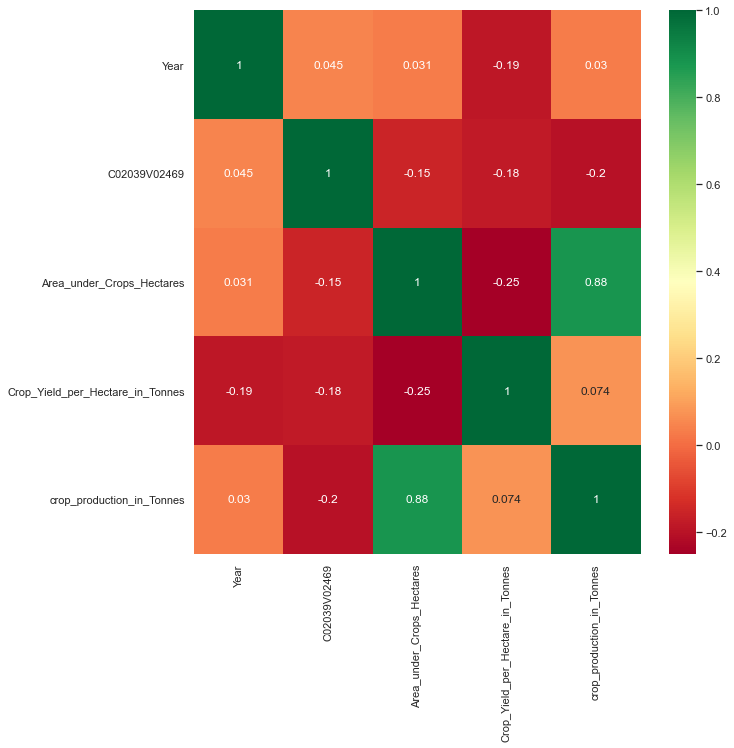

In [56]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#### one hot encoding

In [57]:
df=pd.get_dummies(df, columns = ["Type of Crop"],drop_first=True, prefix="crop_")

In [58]:
df.shape

(550, 21)

In [59]:
df.columns

Index(['Year', 'C02039V02469', 'Area_under_Crops_Hectares',
       'Crop_Yield_per_Hectare_in_Tonnes', 'crop_production_in_Tonnes',
       'crop__Fodder beet', 'crop__Kale and field cabbage',
       'crop__Oilseed rape', 'crop__Potatoes', 'crop__Spring barley',
       'crop__Spring oats', 'crop__Spring wheat', 'crop__Sugar beet',
       'crop__Total barley', 'crop__Total oats', 'crop__Total wheat',
       'crop__Total wheat, oats and barley', 'crop__Turnips',
       'crop__Winter barley', 'crop__Winter oats', 'crop__Winter wheat'],
      dtype='object')

In [61]:
df.corr()['crop_production_in_Tonnes']

Year                                  0.029505
C02039V02469                         -0.202705
Area_under_Crops_Hectares             0.881368
Crop_Yield_per_Hectare_in_Tonnes      0.073780
crop_production_in_Tonnes             1.000000
crop__Fodder beet                    -0.015861
crop__Kale and field cabbage         -0.110180
crop__Oilseed rape                   -0.232303
crop__Potatoes                       -0.029825
crop__Spring barley                   0.197427
crop__Spring oats                    -0.212494
crop__Spring wheat                   -0.183041
crop__Sugar beet                      0.308836
crop__Total barley                    0.330904
crop__Total oats                     -0.175033
crop__Total wheat                     0.053183
crop__Total wheat, oats and barley    0.692950
crop__Turnips                        -0.073375
crop__Winter barley                  -0.108488
crop__Winter oats                    -0.204503
crop__Winter wheat                   -0.005759
Name: crop_pr

In [65]:
df.to_csv('crop_production_predictionML.csv', index=None)